# **3MTT MODULE 4 PROJECT**
# **Name: EMMANUEL OBIORAH**
## **Cohort 3 Fellow ID: FE/24/4793145479**
### **Project Objective**

###The primary goal of this mini-project is to clean, analyze, and visualize COVID-19 data to identify trends, patterns, and key insights. The specific objectives include:

- Perform Data Cleaning: Handle missing values, standardize date formats, and filter out inconsistencies.
- Explore Trends in COVID-19 Cases and Deaths:
  - Analyze daily and cumulative trends in infections and fatalities.
  - Compare case and death rates across different countries and regions.
- Create Data Visualizations:
  - Line Plots: Show the trend of cases, deaths, and vaccinations over time.
  - Bar Charts: Compare cases, deaths, and vaccinations by country.
  - Scatter Plots: Explore relationships between infection rates and testing or vaccination rates.

In [2]:
# Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Set visualization style
sns.set(style ="whitegrid")
plt.rcParams['figure.figsize'] = (10,5)

In [9]:
# Load the uploaded file
import pandas as pd
df = pd.read_csv('Dataset (2).csv')

In [37]:
# Preview
df.head()

,DATE,COUNTRY,NEW_CASES,NEW_DEATHS,VACCINATED
0,2024-11-01,Argentina,NaN,NaN,NaN
1,2024-11-01,Australia,0.0,0.0,327.0
2,2024-11-01,Australia,0.0,0.0,327.0
3,2024-11-01,Brazil,971.0,48.0,430.0
4,2024-11-01,Canada,176.0,8.0,NaN


### 🔧 Data Cleaning and Preprocessing

To prepare the dataset for analysis, we perform the following steps:

1. **Standardize column names** by making them uppercase and replacing spaces with underscores.
2. **Convert the `DATE` column** to datetime format.
3. **Replace `unknown` in the `VACCINATED` column** with `NaN` and convert the column to numeric.
4. **Check for missing values** to understand where we may need imputation or filtering.

In [18]:
# Clean column names: strip spaces, replace with underscores, make uppercase
df.columns = df.columns.str.strip().str.replace(' ', '_').str.upper()

# Convert DATE column to datetime
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

# Convert 'VACCINATED' column to numeric, replacing 'unknown' with NaN
df['VACCINATED'] = df['VACCINATED'].replace('unknown', np.nan)
df['VACCINATED'] = pd.to_numeric(df['VACCINATED'], errors='coerce')

# Check for missing values
df.isnull().sum()

,0
DATE,15
COUNTRY,0
NEW_CASES,11
NEW_DEATHS,26
VACCINATED,17


In [19]:
# Group by country and sum new cases and deaths
country_summary = df.groupby('COUNTRY')[['NEW_CASES', 'NEW_DEATHS']].sum().sort_values(by='NEW_CASES', ascending=False)

# Show top 10 countries
print("Top 10 Countries by Total New COVID-19 Cases:")
print(country_summary.head(10))


Top 10 Countries by Total New COVID-19 Cases:
           NEW_CASES  NEW_DEATHS
COUNTRY                         
Argentina    23576.0      1030.0
Australia    22341.0       931.0
Canada       15010.0       661.0
China        14958.0       730.0
Brazil       13286.0       606.0


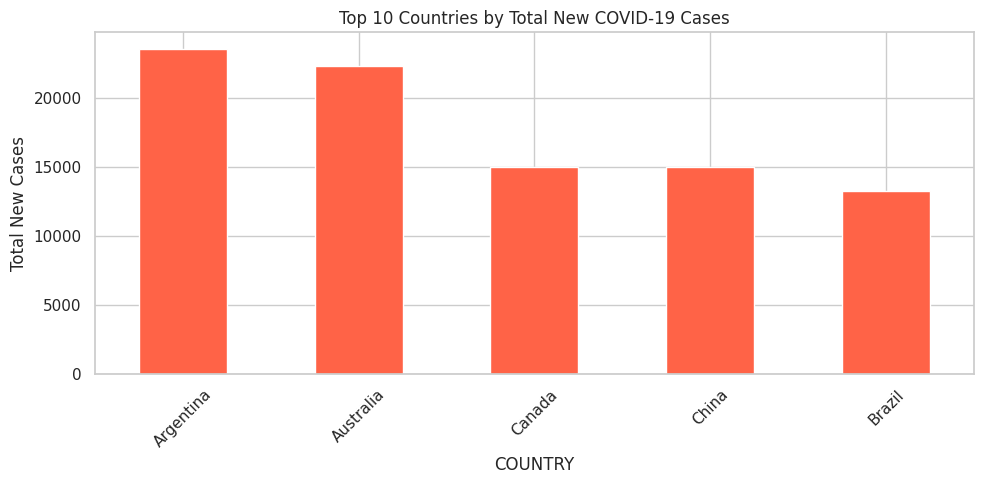

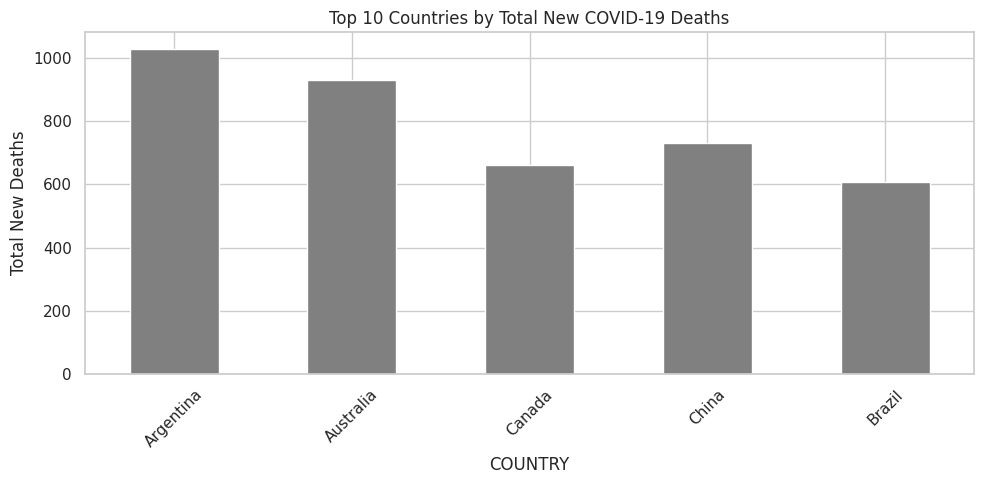

In [22]:
# Select top 10
top10 = country_summary.head(10)

# Bar chart – Total new cases
top10['NEW_CASES'].plot(kind='bar', color='tomato')
plt.title('Top 10 Countries by Total New COVID-19 Cases')
plt.ylabel('Total New Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar chart – Total new deaths
top10['NEW_DEATHS'].plot(kind='bar', color='gray')
plt.title('Top 10 Countries by Total New COVID-19 Deaths')
plt.ylabel('Total New Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


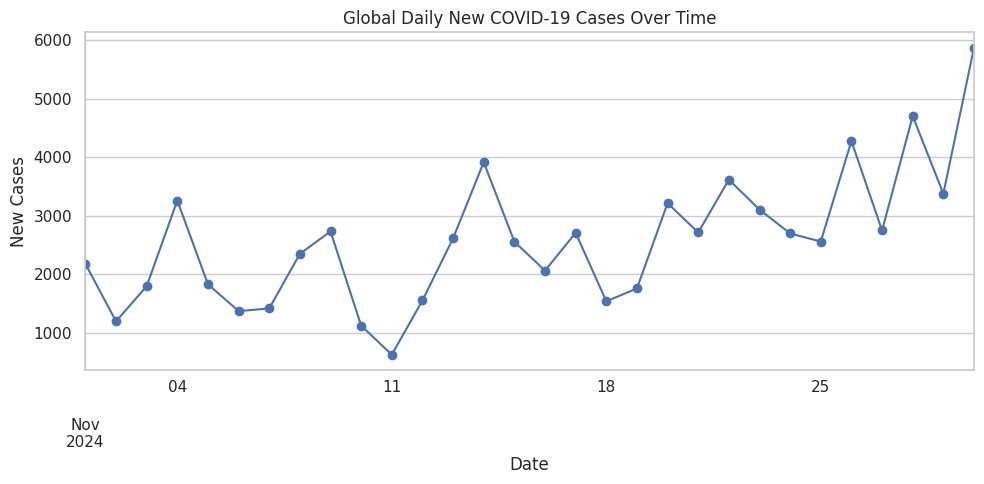

In [39]:
# Group by date to see daily new cases globally
cases_over_time = df.groupby('DATE')['NEW_CASES'].sum()

# Line plot for global daily new cases
cases_over_time.plot(kind='line', marker='o')
plt.title('Global Daily New COVID-19 Cases Over Time')
plt.ylabel('New Cases')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

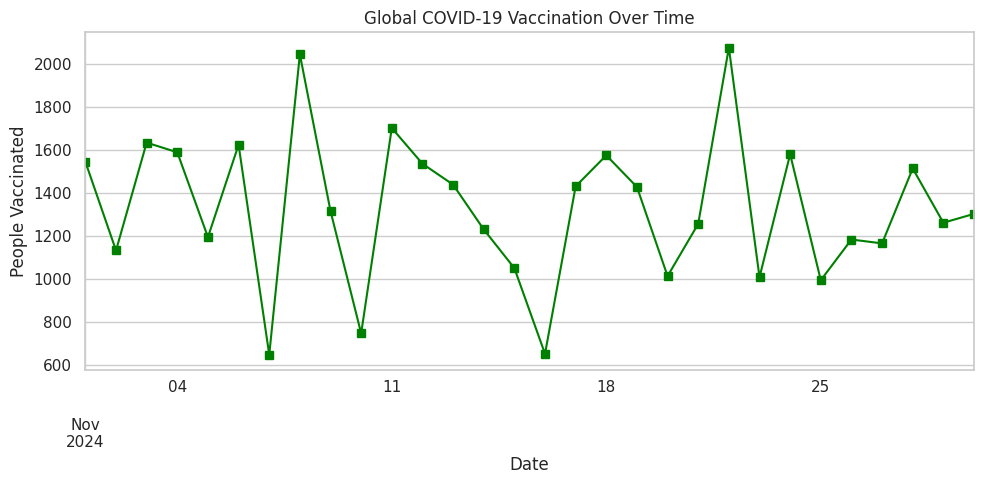

In [24]:
# Group by date to see daily vaccinations
vaccinated_over_time = df.groupby('DATE')['VACCINATED'].sum()

# Line plot for total people vaccinated
vaccinated_over_time.plot(kind='line', marker='s', color='green')
plt.title('Global COVID-19 Vaccination Over Time')
plt.ylabel('People Vaccinated')
plt.xlabel('Date')
plt.tight_layout()
plt.show()


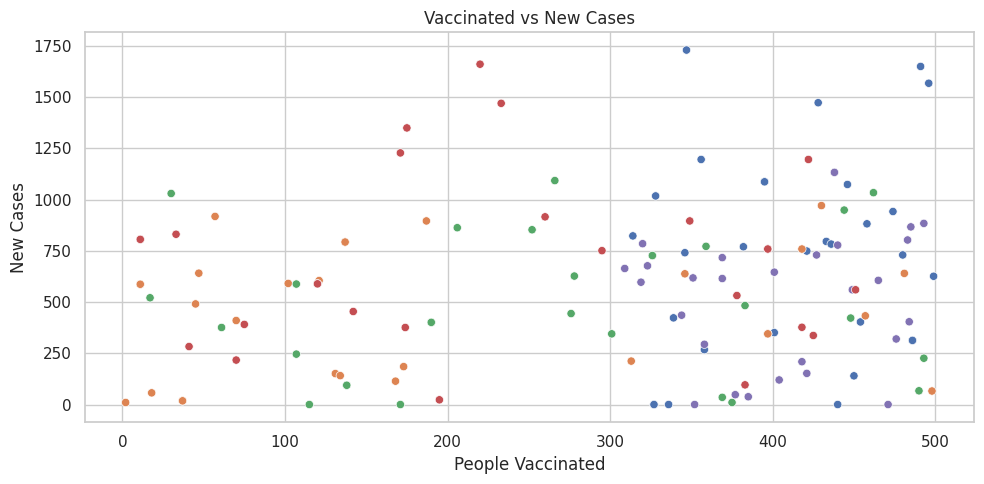

In [25]:
# Remove rows with missing values for scatter analysis
scatter_df = df.dropna(subset=['NEW_CASES', 'VACCINATED'])

# Scatter plot
sns.scatterplot(data=scatter_df, x='VACCINATED', y='NEW_CASES', hue='COUNTRY', legend=False)
plt.title('Vaccinated vs New Cases')
plt.xlabel('People Vaccinated')
plt.ylabel('New Cases')
plt.tight_layout()
plt.show()


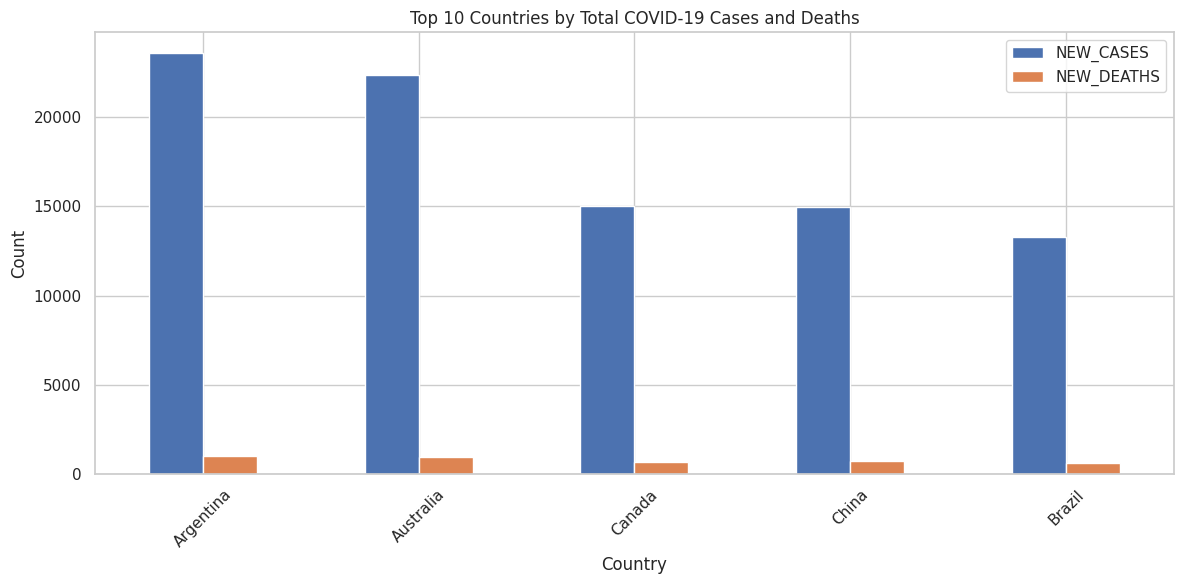

In [27]:
# Group data by country and calculate total new cases and deaths
country_stats = df.groupby('COUNTRY')[['NEW_CASES', 'NEW_DEATHS']].sum().sort_values(by='NEW_CASES', ascending=False).head(10)

# Bar chart for total new cases and deaths by country
country_stats.plot(kind='bar', figsize=(12,6))
plt.title('Top 10 Countries by Total COVID-19 Cases and Deaths')
plt.ylabel('Count')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


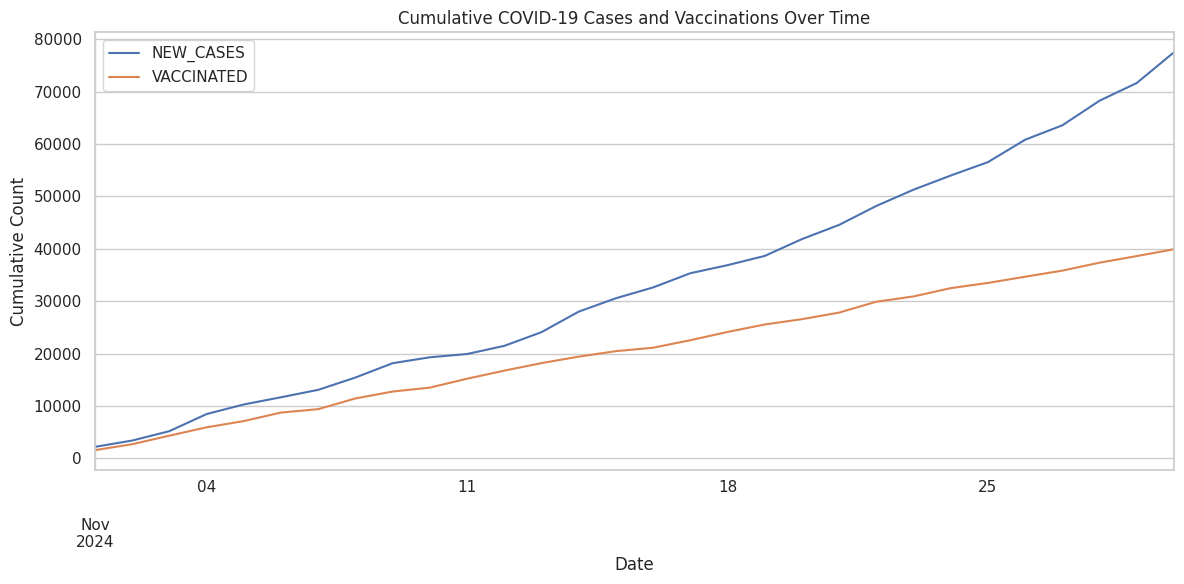

In [28]:
# Group by date and compute cumulative totals
daily = df.groupby('DATE')[['NEW_CASES', 'VACCINATED']].sum().cumsum()

# Plot cumulative trends
daily.plot(figsize=(12,6))
plt.title('Cumulative COVID-19 Cases and Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Count')
plt.tight_layout()
plt.show()


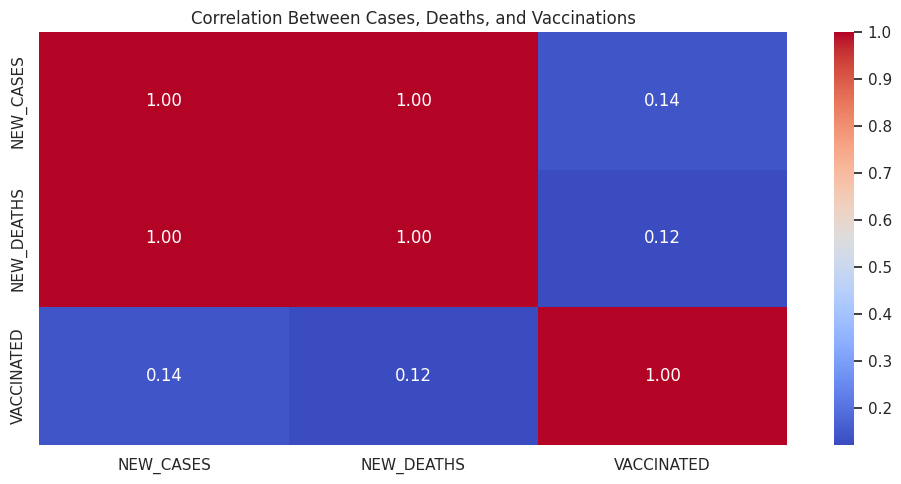

In [29]:
# Compute correlation matrix
corr_matrix = df[['NEW_CASES', 'NEW_DEATHS', 'VACCINATED']].corr()

# Display heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Cases, Deaths, and Vaccinations')
plt.tight_layout()
plt.show()


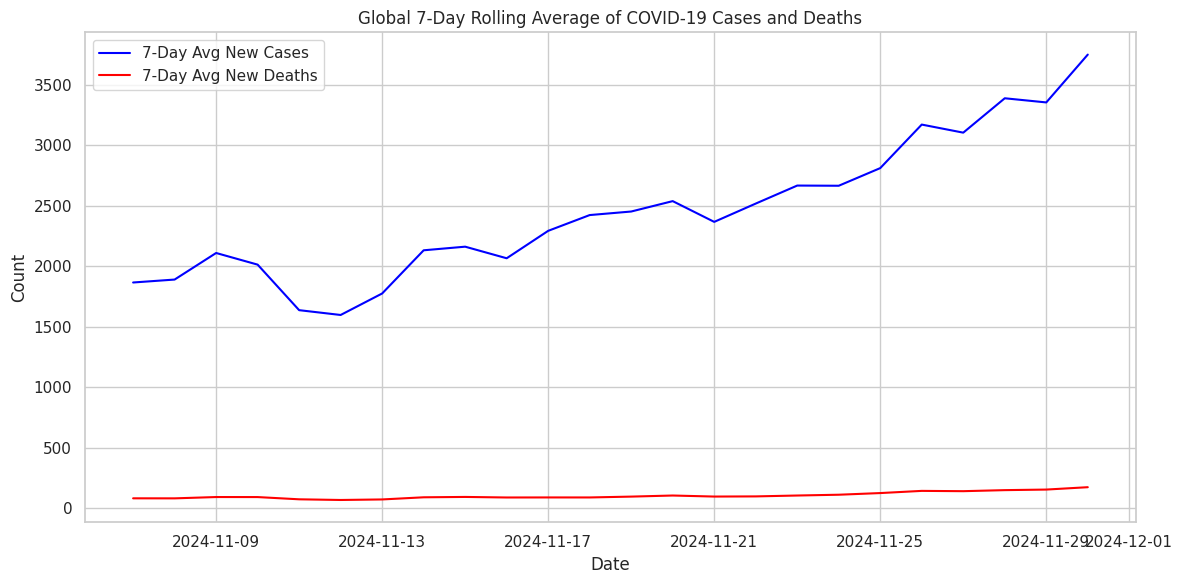

In [31]:
# 7-day rolling average of new cases and deaths
daily_rolling = df.groupby('DATE')[['NEW_CASES', 'NEW_DEATHS']].sum().rolling(window=7).mean()

# Line plot
plt.figure(figsize=(12, 6))
plt.plot(daily_rolling.index, daily_rolling['NEW_CASES'], label='7-Day Avg New Cases', color='blue')
plt.plot(daily_rolling.index, daily_rolling['NEW_DEATHS'], label='7-Day Avg New Deaths', color='red')
plt.title('Global 7-Day Rolling Average of COVID-19 Cases and Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()


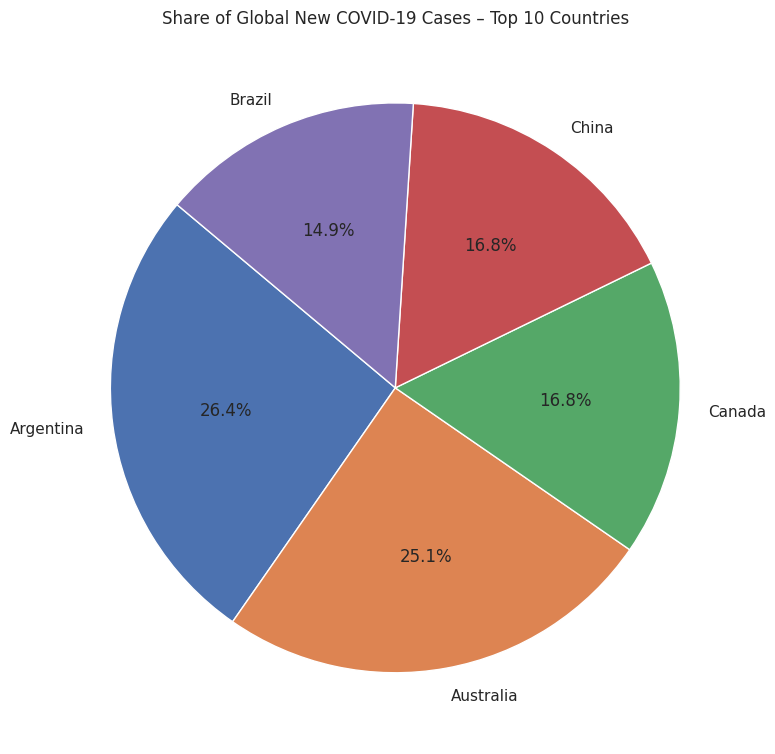

In [34]:
# Top 10 countries by new cases
country_total = df.groupby('COUNTRY')['NEW_CASES'].sum().sort_values(ascending=False).head(10)

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(country_total, labels=country_total.index, autopct='%1.1f%%', startangle=140)
plt.title('Share of Global New COVID-19 Cases – Top 10 Countries')
plt.tight_layout()
plt.show()


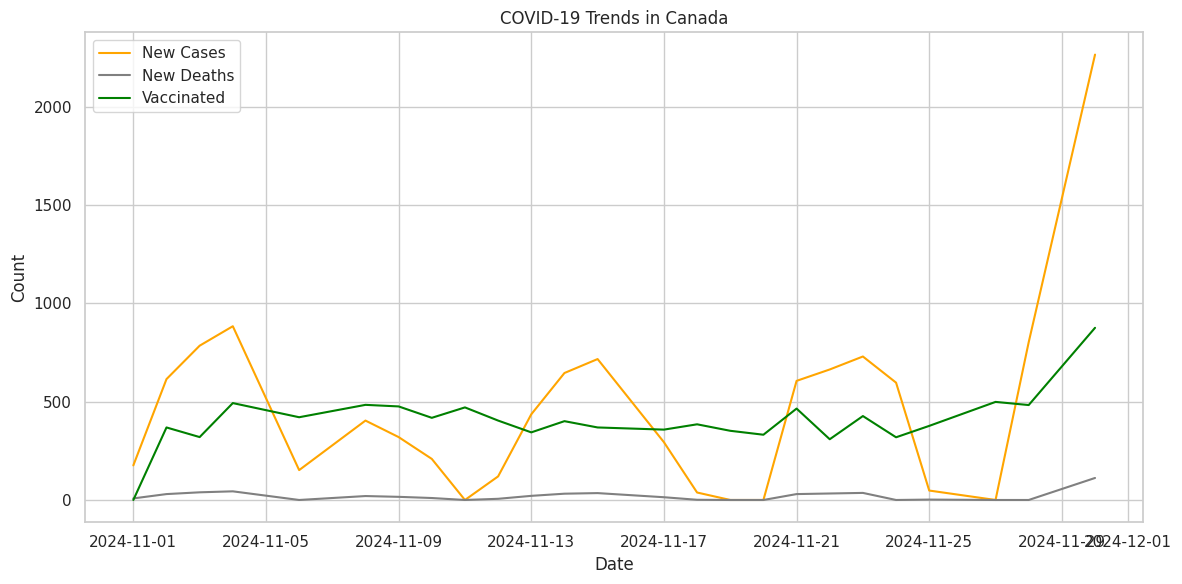

In [35]:
# Filter for Canada and group by date
canada_df = df[df['COUNTRY'] == 'Canada'].groupby('DATE')[['NEW_CASES', 'NEW_DEATHS', 'VACCINATED']].sum()

# Line plot
plt.figure(figsize=(12, 6))
plt.plot(canada_df.index, canada_df['NEW_CASES'], label='New Cases', color='orange')
plt.plot(canada_df.index, canada_df['NEW_DEATHS'], label='New Deaths', color='gray')
plt.plot(canada_df.index, canada_df['VACCINATED'], label='Vaccinated', color='green')
plt.title('COVID-19 Trends in Canada')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()


## 📌 Key Insights and Summary

After analyzing and visualizing the COVID-19 dataset, the following insights were uncovered:

- 📈 **Global case trends show periodic spikes**, indicating waves of infections. This reflects the impact of reopening, seasonal changes, or new variants.
- 💉 **Vaccination trends steadily increase over time**, though some countries show delayed or low uptake, likely due to access, awareness, or reporting delays.
- 🔄 **There is no immediate visible inverse correlation between vaccination and daily new cases** in the scatter plot, possibly due to:
  - Time lags between vaccination and immunity
  - Inconsistent or delayed reporting
  - Population size differences
- 🌍 **Top 5 countries by new cases** include Argentina, Australia, Canada, China, and Brazil, highlighting regions with either large populations or comprehensive testing/reporting systems.
- ☠️ **Countries with high case counts often have proportionally high death counts**, though some have lower death rates — possibly due to stronger healthcare systems or early vaccination campaigns.
- 📊 **The cumulative chart shows exponential growth** early on, followed by gradual slowing — likely influenced by vaccination, lockdowns, or behavior changes.
- 📌 **Correlation analysis revealed**:
  - A **strong positive correlation** between new cases and new deaths.
  - A **weak correlation** between vaccination numbers and daily new cases — suggesting further time-based or demographic analysis is needed for clarity.

---

### ✅ Final Thought

The data suggests that **vaccination alone does not instantly suppress case numbers** — policy, timing, and data quality also matter. However, as vaccinations rise, overall case and death trends begin to stabilize, showing a delayed but real impact.

